In [ ]:
'''
PCA를 이용한 차원의 감소
그러면 PCA 분석을 이용하여 차원을 어떻게 감소 시키는가?
PCA 분석을 하더라도 단순히 축을 틀어버린것이기 때문에 차원의 수는 줄어들지 않는다. PCA 분석을 하면, 각 피쳐 (축) 별로, 값의 변화도 (Variance : 해당 축의 값이 얼마나 크게 변하는가)를 볼 수 있는데, 다음은 PCA Variance 값의 예제이다.
[차원 감소와 PCA 분석](https://bcho.tistory.com/1209?category=555440)
'''

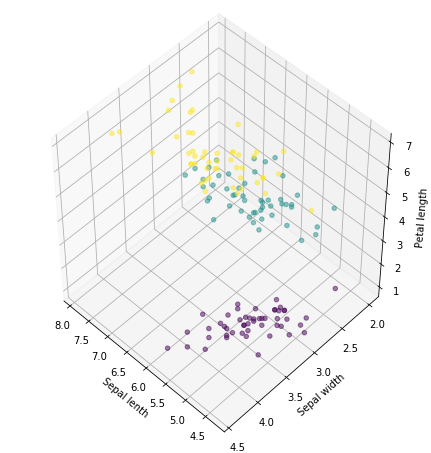

In [3]:
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data,columns=['Sepal length','Sepal width','Petal length','Petal width'])

fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(data['Sepal length'],data['Sepal width'],data['Petal length'],c=labels,alpha=0.5)
ax.set_xlabel('Sepal lenth')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.show()

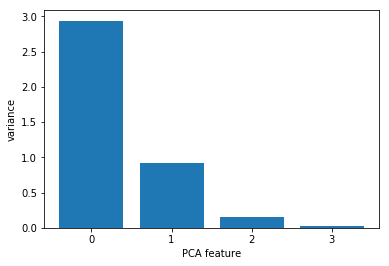

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(data)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()
# 분석을 해보면 PCA 분석에 의해서 변환된 피쳐 0,1의 Variation이 큰것을 확인할 수 있다. 

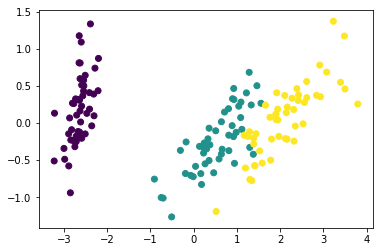

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

model = PCA(n_components=2)
pca_features = model.fit_transform(data)

xf = pca_features[:,0]
yf = pca_features[:,1]
plt.scatter(xf,yf,c=labels);
plt.show();


# 그래서 PCA 변환된 피쳐중 0,1번 피쳐만 사용해서 시각화를 해보면 다음과 같다.
# 그림처럼 2차원으로 줄여도 IRIS 군집화의 특성이 어느정도 남아 있는 것을 확인할 수 있다. 

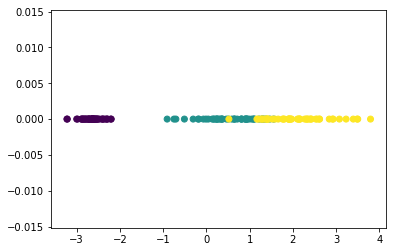

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

model = PCA(n_components=1)
pca_features = model.fit_transform(data)

xf = pca_features[:,0]
yf = len(xf)*[0]
plt.scatter(xf,yf,c=labels);
plt.show();
# 다음은 1차원으로 줄여서 시각화를 한 예인데